Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
2023-10-04 03:29:01.007787: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load dataset

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

Explore Dataset

In [ ]:
print(df.head())

In [ ]:
Data Preprocessing

In [3]:
df = df.dropna()
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

Feature Engineering

In [4]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Initial Model Training-Deep Learning Model

In [5]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
716/716 [==============================] - 2s 2ms/step - loss: 0.4698 - accuracy: 0.8071 - val_loss: 0.3107 - val_accuracy: 0.8837
Epoch 2/50
716/716 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8611 - val_loss: 0.3021 - val_accuracy: 0.8884
Epoch 3/50
716/716 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8679 - val_loss: 0.2904 - val_accuracy: 0.8944
Epoch 4/50
716/716 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.8777 - val_loss: 0.2855 - val_accuracy: 0.8980
Epoch 5/50
716/716 [==============================] - 1s 2ms/step - loss: 0.3099 - accuracy: 0.8841 - val_loss: 0.2804 - val_accuracy: 0.9005
Epoch 6/50
716/716 [==============================] - 1s 2ms/step - loss: 0.3047 - accuracy: 0.8855 - val_loss: 0.2664 - val_accuracy: 0.9069
Epoch 7/50
716/716 [==============================] - 1s 2ms/step - loss: 0.2982 - accuracy: 0.8925 - val_loss: 0.2640 - val_accuracy: 0.9068
Epoch 

Hyperparameter Tuning on Random Forest Model

In [6]:
param_dist = {'n_estimators': [50, 100, 150],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [10, 20, 30, None],
              'bootstrap': [True, False]}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1)
random_search_rf.fit(X_train_poly, y_train)

best_rf_model = random_search_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Inte

/Users/nafiskhan/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nafiskhan/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/nafiskhan/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

Final Model Evaluation

In [7]:
rf_predictions = best_rf_model.predict(X_test_poly)
print(f"Random Forest Model Accuracy: {accuracy_score(y_test, rf_predictions)*100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Model Accuracy: 93.37%

Confusion Matrix:
[[4404   39]
 [ 341  944]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4443
           1       0.96      0.73      0.83      1285

    accuracy                           0.93      5728
   macro avg       0.94      0.86      0.90      5728
weighted avg       0.94      0.93      0.93      5728



SHAP Values Calculation and Plot

In [ ]:
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_poly)

[CV] END bootstrap=False, max_depth=20, max_features=auto, n_estimators=100; total time=  13.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=150; total time=  21.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, n_estimators=150; total time=  10.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=150; total time=  11.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, n_estimators=100; total time=  13.1s
[CV] END bootstrap=False, max_depth=None, max_features=auto, n_estimators=150; total time=  21.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, n_estimators=150; total time=  10.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=150; total time=  11.5s
[CV] END bootstrap=False, max_depth=20, max_features=auto, n_estimators=100; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=150; total time=   8.4s
[CV] END bootstrap=False, max_depth=1

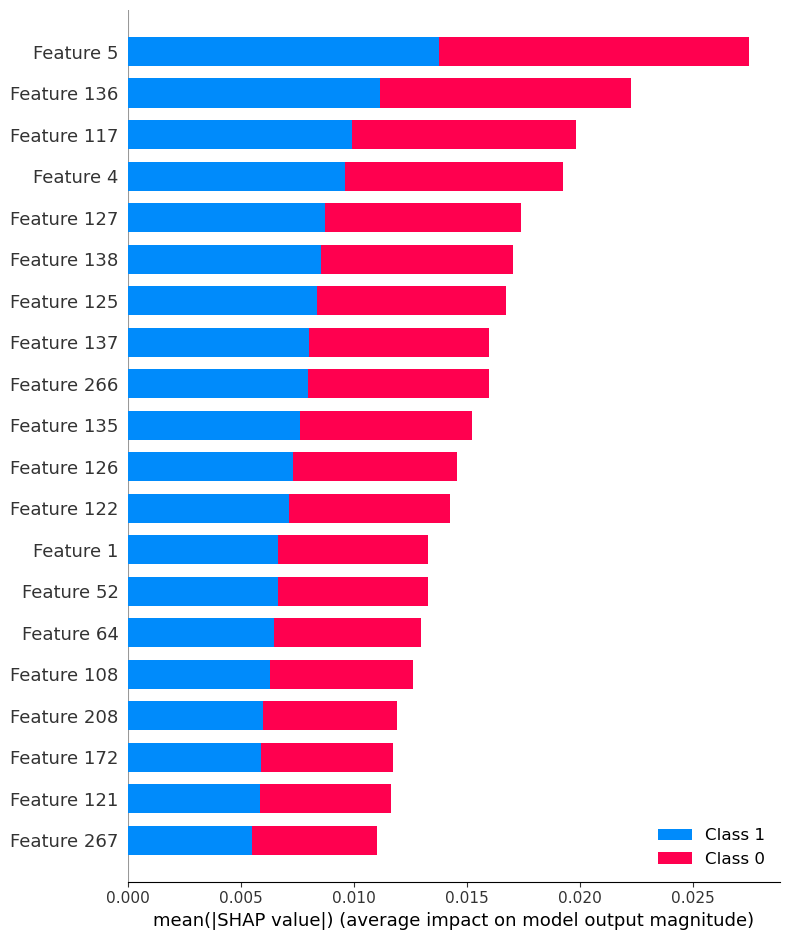

In [10]:
shap.summary_plot(shap_values, X_test_poly, plot_type="bar")